In [108]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [90]:
def load_concat(folderpath):
    print("Load all files from folder and concatenate")
    filenames = os.listdir(folderpath)
    print("Found {} files".format(len(filenames)))
    dfs = []
    i = 1
    for filename in filenames:
        if not re.match('\..*', filename):
            dfs.append(pd.read_csv(folderpath + filename, delimiter='\t'))
            print("loaded {} out of {} files".format(i, len(filenames)), end="\r")
            i += 1
    # Concatenate all data into one DataFrame
    X = pd.concat(dfs, ignore_index=True)
    return X

In [93]:
# Parameters
folderpath = './predictions/'
data = load_concat(fodlerpath)

Load all files from folder and concatenate
Found 28 files


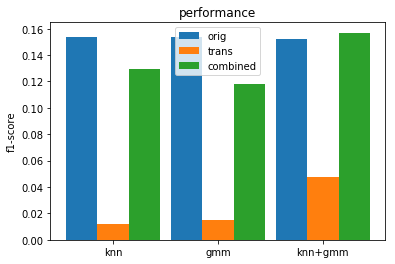

In [125]:
# By osfs:
data_osfs = data.groupby('osfs').mean()
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
mywidth = 0.3
x_orig = np.arange(1,4)
x_trans = x_orig+mywidth
x_comb = x_orig+2*mywidth
names = ['knn', 'gmm', 'knn+gmm']
ax1.bar(x_orig, data_osfs['f1_orig'], tick_label = names, width=mywidth, label = 'orig')
ax1.bar(x_trans, data_osfs['f1_trans'], tick_label = names, width=mywidth, label = 'trans')
ax1.bar(x_comb, data_osfs['f1_combined'], width=mywidth, label = 'combined')
ax1.set_ylabel('f1-score')
ax1.set_title('performance')
ax1.legend()

In [162]:
data.columns

Index(['subsample', 'fold', 'classifier', 'osfs', 'bags', 'sample_ratio',
       'bias', 'neighbors', 'nog', 'distances', 'weights', 'perturbations',
       'testrandom', 'f1_orig', 'f1_trans', 'f1_combined'],
      dtype='object')

In [163]:
data_nog = data.groupby('nog', as_index=False).mean()
data_nog.columns

Index(['nog', 'subsample', 'fold', 'bags', 'sample_ratio', 'bias',
       'perturbations', 'testrandom', 'f1_orig', 'f1_trans', 'f1_combined'],
      dtype='object')

In [171]:
data

,subsample,fold,classifier,osfs,bags,sample_ratio,bias,neighbors,nog,distances,weights,perturbations,testrandom,f1_orig,f1_trans,f1_combined
0,1.0,0,xgBoost,['knn'],5,0.01,2,[2],"[1, 2, 3, 4, 5, 6, 7]",[2],uniform,1,True,0.165295,0.069403,0.183594
1,1.0,1,xgBoost,['knn'],5,0.01,2,[2],"[1, 2, 3, 4, 5, 6, 7]",[2],uniform,1,True,0.168773,0.013158,0.171767
2,1.0,2,xgBoost,['knn'],5,0.01,2,[2],"[1, 2, 3, 4, 5, 6, 7]",[2],uniform,1,True,0.149752,0.084622,0.157938
3,1.0,3,xgBoost,['knn'],5,0.01,2,[2],"[1, 2, 3, 4, 5, 6, 7]",[2],uniform,1,True,0.159617,0.045512,0.143265
4,1.0,4,xgBoost,['knn'],5,0.01,2,[2],"[1, 2, 3, 4, 5, 6, 7]",[2],uniform,1,True,0.151002,0.074241,0.159020
5,1.0,0,SVM,['gmm'],5,0.01,2,[2],[1],[2],uniform,1,True,0.130983,0.000000,0.131811
6,1.0,1,SVM,['gmm'],5,0.01,2,[2],[1],[2],uniform,1,True,0.136669,0.003515,0.136862
7,1.0,2,SVM,['gmm'],5,0.01,2,[2],[1],[2],uniform,1,True,0.119444,0.000000,0.119751
8,1.0,3,SVM,['gmm'],5,0.01,2,[2],[1],[2],uniform,1,True,0.124698,0.000000,0.124879
9,1.0,4,SVM,['gmm'],5,0.01,2,[2],[1],[2],uniform,1,True,0.119572,0.003731,0.119755


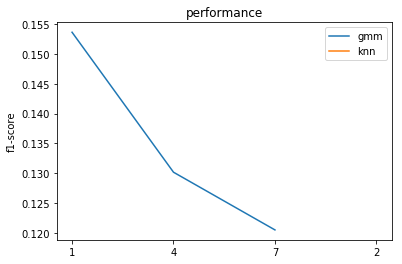

In [174]:
# By nog:
data_nog = data.groupby('nog', as_index=False).mean()
# add column that reads the max number of nogs from the nog-list
data_nog['nog_max'] = data_nog['nog'].apply(lambda a: max([x.strip() for x in re.findall('[0-9]{1}', a)]))
data_nog.sort_values('nog_max', inplace=True)

data_knn = data.groupby('neighbors', as_index=False).mean()
# add column that reads the max number of nogs from the nog-list
data_knn['knn_max'] = data_knn['neighbors'].apply(lambda a: max([x.strip() for x in re.findall('[0-9]{1}', a)]))
data_knn.sort_values('knn_max', inplace=True)

fig2, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot(data_nog['nog_max'], data_nog['f1_combined'], label = 'gmm')
ax1.plot(data_knn['knn_max'], data_knn['f1_combined'], label = 'knn')

ax1.set_ylabel('f1-score')
ax1.set_title('performance of combined dataset')
ax1.legend()

In [ ]:
# By data:
data_samples = data.groupby('n_samples', as_index=False).mean()
# add column that reads the max number of nogs from the nog-list
data_samples.sort_values('n_samples', inplace=True)

fig3, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.plot(data_samples['n_samples'], data_samples['f1_orig'], label = 'original')
ax1.plot(data_samples['n_samples'], data_samples['f1_trans'], label = 'transformed')
ax1.plot(data_samples['n_samples'], data_samples['f1_combined'], label = 'combined')

ax1.set_ylabel('f1-score')
ax1.set_title('performance of combined dataset')
ax1.legend()